In [1]:
import pandas as pd

# Use the selected features dataset
df = pd.read_csv("../data/heart_disease_selected.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (297, 10)
Target shape: (297,)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

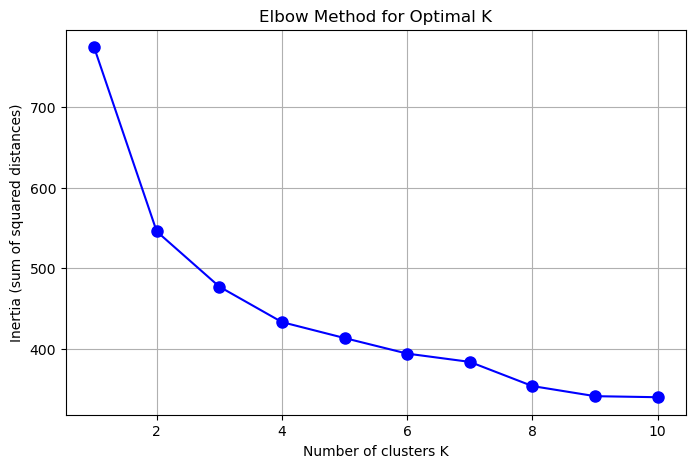

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal K using elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


In [4]:
# Apply K-Means with chosen K (example: K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df['kmeans_cluster'] = clusters
print(df[['target','kmeans_cluster']].head())


   target  kmeans_cluster
0       0               1
1       2               1
2       1               1
3       0               1
4       0               0


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


kmeans_cluster    0   1
target                 
0               135  25
1                30  24
2                 8  27
3                 9  26
4                 1  12


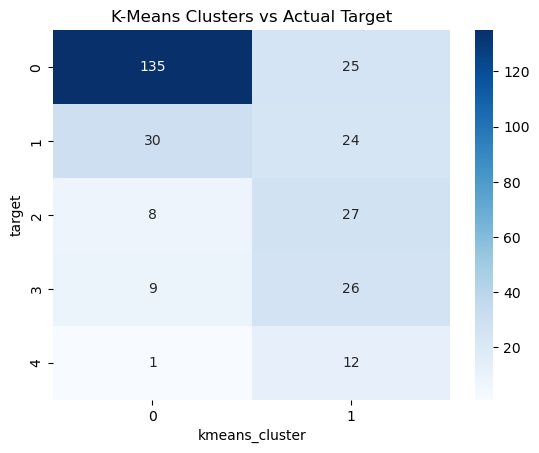

In [5]:
import seaborn as sns

# Cross-tabulation
cross_tab = pd.crosstab(df['target'], df['kmeans_cluster'])
print(cross_tab)

# Optional heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("K-Means Clusters vs Actual Target")
plt.show()


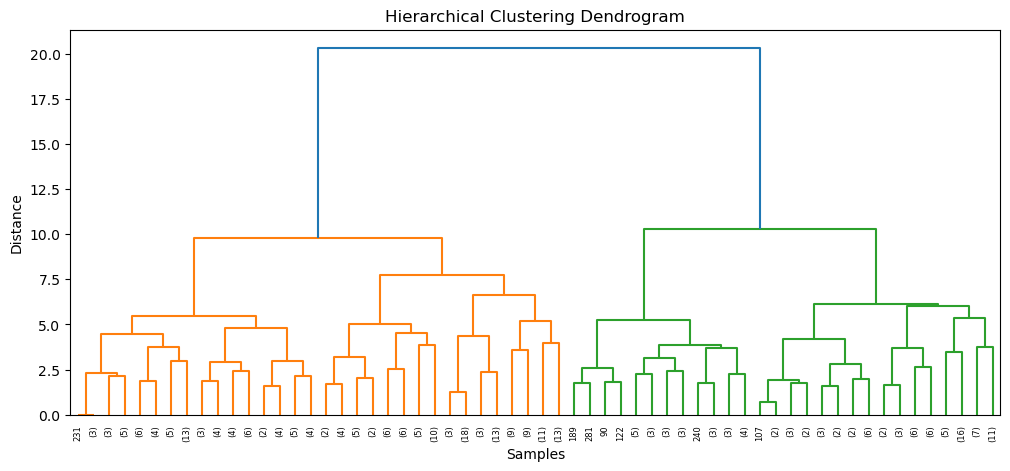

hier_cluster    1   2
target               
0             136  24
1              31  23
2              11  24
3               9  26
4               4   9


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Compute linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Form flat clusters (example: 2 clusters)
hier_clusters = fcluster(Z, t=2, criterion='maxclust')
df['hier_cluster'] = hier_clusters

# Compare with actual target
cross_tab_hier = pd.crosstab(df['target'], df['hier_cluster'])
print(cross_tab_hier)
